In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image_path = "i2.jpg"
image = cv2.imread(image_path)

In [14]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [15]:
_, binary_mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

In [16]:
alpha_channel = cv2.bitwise_not(binary_mask)

In [17]:
bgra_image = cv2.merge((image[:, :, 0], image[:, :, 1], image[:, :, 2], alpha_channel))

(-0.5, 334.5, 233.5, -0.5)

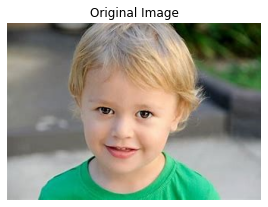

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")


(-0.5, 334.5, 233.5, -0.5)

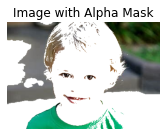

In [19]:
plt.subplot(1, 2, 2)
plt.title("Image with Alpha Mask")
plt.imshow(cv2.cvtColor(bgra_image, cv2.COLOR_BGRA2RGBA))
plt.axis("off")



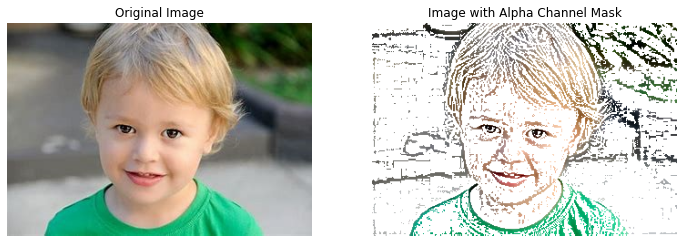

In [20]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding to create a binary mask, to capture the subject
binary_mask = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 11, 2)

# Invert the mask so that the background is black (transparent in alpha) and the subject is white (opaque in alpha)
alpha_channel = cv2.bitwise_not(binary_mask)

# Add the alpha channel to the original image
bgra_image = cv2.merge((image[:, :, 0], image[:, :, 1], image[:, :, 2], alpha_channel))

# Display the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Image with Alpha Channel Mask")
plt.imshow(cv2.cvtColor(bgra_image, cv2.COLOR_BGRA2RGBA))
plt.axis("off")

plt.show()

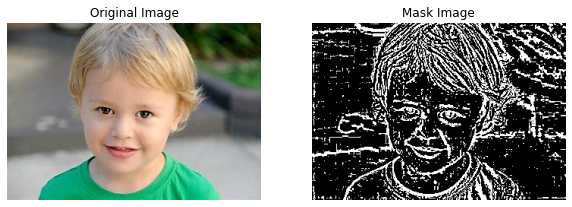

In [21]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding to create a binary mask
# This helps to separate the subject from the background
binary_mask = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Invert the mask so the subject is white (foreground) and background is black
mask = cv2.bitwise_not(binary_mask)

# Display the original image and the mask
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Mask Image")
plt.imshow(mask, cmap="gray")
plt.axis("off")

plt.show()

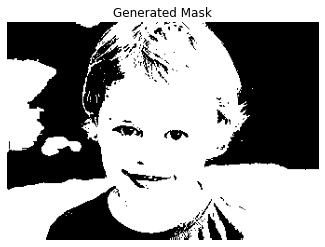

In [22]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply threshold to create a mask
_, mask = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Display the mask
plt.imshow(mask, cmap='gray')
plt.title('Generated Mask')
plt.axis('off')
plt.show()

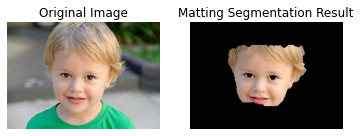

In [23]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# Define a rough rectangle around the foreground object
# Adjust these values to tightly fit around the object you want to segment
height, width = image.shape[:2]
rect = (50, 50, width - 100, height - 100)

# Initialize the mask and models
mask = np.zeros(image.shape[:2], np.uint8)  # Mask initialized to zero (background)
bgd_model = np.zeros((1, 65), np.float64)   # Background model for GrabCut
fgd_model = np.zeros((1, 65), np.float64)   # Foreground model for GrabCut

# Apply GrabCut
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Create a binary mask where sure foreground and probable foreground pixels are set to 1
mask_binary = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the image for transparency (alpha channel creation)
result = image_rgb * mask_binary[:, :, np.newaxis]

# Display the result
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title("Matting Segmentation Result")
plt.axis("off")
plt.show()

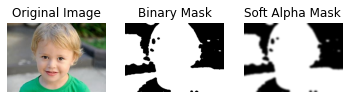

In [24]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a binary mask using a threshold for initial segmentation
_, binary_mask = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

# Dilate and erode the mask to refine edges slightly (optional step for cleanup)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
refined_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

# Create a soft mask using Gaussian blur
soft_mask = cv2.GaussianBlur(refined_mask, (15, 15), 0)

# Normalize soft mask to keep values in the range [0, 255] for visualization
soft_mask = cv2.normalize(soft_mask, None, 0, 255, cv2.NORM_MINMAX)

# Display the result
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(refined_mask, cmap='gray')
plt.title("Binary Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(soft_mask, cmap='gray')
plt.title("Soft Alpha Mask")
plt.axis("off")

plt.show()